In [21]:
import scipy.stats as stats

In [22]:
type1 = [9,12,10,8,15]
type2 = [20,21,23,17,30]
type3 = [6,5,8,16,7]

stats.f_oneway(type1, type2, type3)

F_onewayResult(statistic=16.082840236686387, pvalue=0.0004023258333620147)

In [67]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import pandas as pd
import numpy as np

In [46]:
df = pd.DataFrame([["type1", x] for x in type1] + [["type2", x] for x in type2] + [["type3", x] for x in type3], columns = ['type', 'value'])

In [68]:
tukey = MultiComparison(df['value'], df['type'])

In [77]:
print(tukey.tukeyhsd(alpha=0.01).summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 type1  type2     11.4 0.0024   2.1286 20.6714   True
 type1  type3     -2.4 0.6318 -11.6714  6.8714  False
 type2  type3    -13.8  0.001 -23.0714 -4.5286   True
-----------------------------------------------------


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

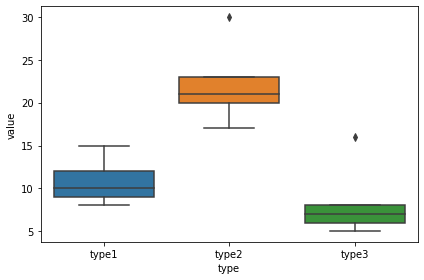

In [80]:
fig = plt.figure(figsize=(6,4));
sns.boxplot(x='type',y='value',data=df)
plt.tight_layout()

In [95]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

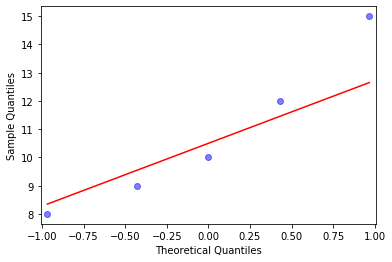

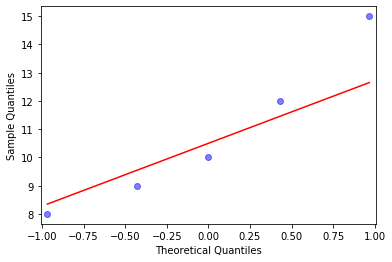

In [105]:
sm.graphics.qqplot(np.array(type1), line='q', alpha=0.5)

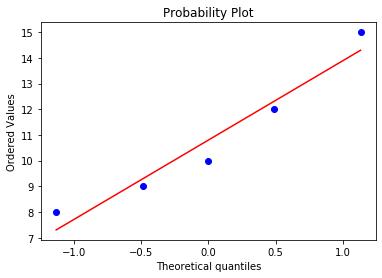

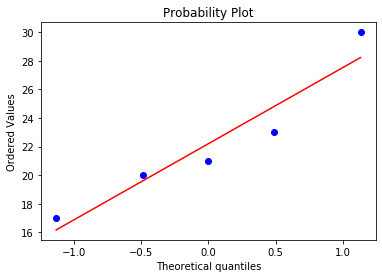

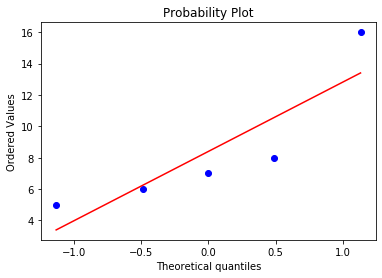

In [107]:
stats.probplot(type1, dist="norm", plot=pylab)
pylab.show()
stats.probplot(type2, dist="norm", plot=pylab)
pylab.show()
stats.probplot(type3, dist="norm", plot=pylab)
pylab.show()

In [108]:
stats.kruskal(type1, type2, type3)

KruskalResult(statistic=10.373524150268333, pvalue=0.005590077794787904)

In [115]:
value = [1244,21,82,2221,905,839,281,129,396,1306,336,910,220,84,458,543,300,794,225,83,425,552,291,826,19,11,-34,121,15,103,-20,35,-53,170,104,199]
errordf = pd.DataFrame({'error': value,
                      'algorithm': np.repeat(['A1','A2','A3','A4','A5','A6'],6),
                      'project': ['P1','P2','P3','P4','P5','P6']*6})

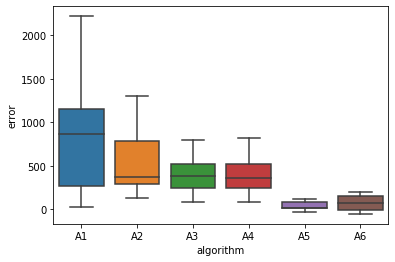

In [118]:
sns.boxplot(x='algorithm',y='error',data=errordf)

In [121]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import friedmanchisquare

In [158]:
mod = ols('error ~ C(algorithm) + C(project)', errordf).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)
# PR(>F) = P-value

                    sum_sq    df         F    PR(>F)
C(algorithm)  2.989130e+06   5.0  5.376958  0.001720
C(project)    2.287339e+06   5.0  4.114551  0.007295
Residual      2.779574e+06  25.0       NaN       NaN


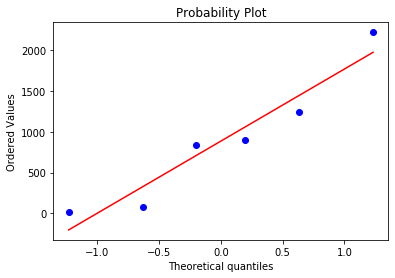

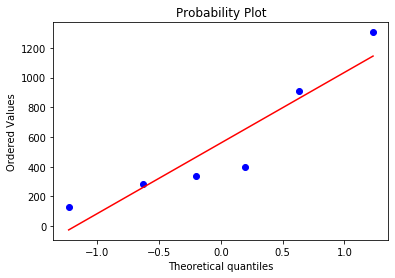

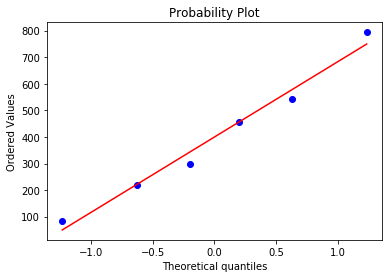

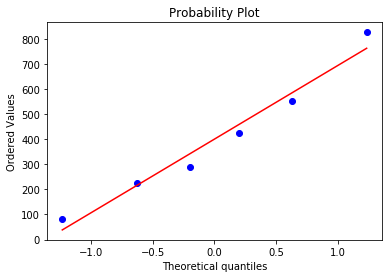

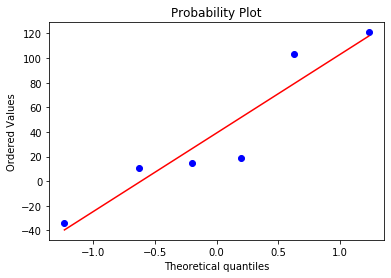

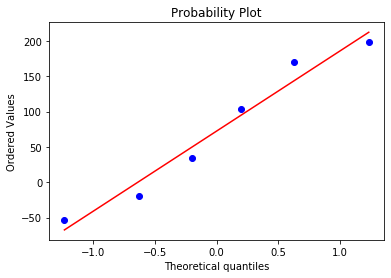

In [144]:
for x in range(0,36,6):
    stats.probplot(value[x:x+6], dist="norm", plot=pylab)
    pylab.show()

In [145]:
# non parametric test
friedmanchisquare(value[0:6],value[6:12],value[12:18],value[18:24],value[24:30],value[30:36])

FriedmanchisquareResult(statistic=20.76190476190476, pvalue=0.0008983896302228166)

In [156]:
a = 'A'
b = 'B'
c = 'C'
d = 'D'
e = 'E'
value2 = [8,7,1,7,3,11,2,7,3,8,4,9,10,1,5,6,8,6,6,10,4,2,3,8,8]
ingredient = [a,b,d,c,e,c,e,a,d,b,b,a,c,e,d,d,c,e,b,a,e,d,b,a,c]
timedf = pd.DataFrame({'time': value2,
                       'batch': np.repeat(['B1','B2','B3','B4','B5'],5),
                       'day': ['D1','D2','D3','D4','D5']*5,
                       'ingredient': ingredient})

In [160]:
mod2 = ols('time ~ C(batch) + C(day) + C(ingredient)', timedf).fit()
anova_table2 = sm.stats.anova_lm(mod2, typ=2)
print(anova_table2)

               sum_sq    df          F    PR(>F)
C(batch)        15.44   4.0   1.234542  0.347618
C(day)          12.24   4.0   0.978678  0.455014
C(ingredient)  141.44   4.0  11.309168  0.000488
Residual        37.52  12.0        NaN       NaN
